In [71]:
import seaborn as sns
import numpy as np
import json
import pandas as pd
from matplotlib import pyplot as plt

In [72]:
with open("/home/joud/code/relu_analysis/dynn/src/plasticity_analysis/results/accs.json") as json_file:
    results_1 = json.load(json_file)

with open("/home/joud/code/relu_analysis/dynn/src/plasticity_analysis/results/accs_2.json") as json_file:
    results_2 = json.load(json_file)

with open("/home/joud/code/relu_analysis/dynn/src/plasticity_analysis/results/accs_3.json") as json_file:
    results_3 = json.load(json_file)


CONTINUAL_ACCS = 'continual_accs'
RESET_ACCS = 'reset_accs'



In [73]:
def build_df(dicts):
    rows = []
    for trial_idx, dictio in enumerate(dicts):
        for task_idx, key in enumerate(dictio.keys()): # loop over tasks
            last_continual_acc = dictio[key][CONTINUAL_ACCS][-1]
            last_reset_acc = dictio[key][RESET_ACCS][-1]
            rows.append([trial_idx, task_idx, last_continual_acc, 'continual'])
            rows.append([trial_idx, task_idx, last_reset_acc, 'reinitialized'])
    df = pd.DataFrame(rows, columns = ['trial', 'task', 'acc', 'type'])
    return df

seaborn_df = build_df([results_1, results_2, results_3])
print(seaborn_df.head())

   trial  task        acc           type
0      0     0  91.943779      continual
1      0     0  91.909500  reinitialized
2      0     1  91.487869      continual
3      0     1  91.136131  reinitialized
4      0     2  91.226837      continual


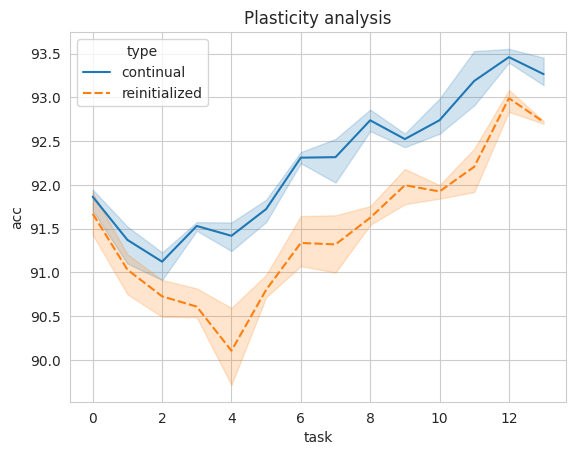

In [74]:
fig, ax = plt.subplots()
df = pd.DataFrame(seaborn_df, columns = ['trial', 'task', 'acc', 'type'])
# print(df.head(6))

sns.lineplot(data=seaborn_df, x='task', y='acc', style='type', hue='type')
plt.title("Plasticity analysis")
# plt.show()
plt.savefig("plasticity_analysis.pdf")